# Analysing gpt-4o-mini vs finetuned model:

In [1]:
import midi
import glob
import numpy as np
import pretty_midi
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval import core, utils
from sklearn.model_selection import LeaveOneOut

In [2]:
MODEL_1 = "gpt-4o-mini"
MODEL_2 = "finetuned"

SET_1_PATH = "data/evaluation/midi/{}/*".format(MODEL_1)
SET_2_PATH = "data/evaluation/midi/{}/*".format(MODEL_2)

## Absolute measurement: statistic analysis


Assign sample dataset path

In [3]:
set1 = glob.glob(SET_1_PATH)
print(set1)

['data/evaluation/midi/gpt-4o-mini/dialog_40_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_58_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_75_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_88_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_73_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_10_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_81_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_33_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_0_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_28_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_87_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_26_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_18_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_14_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_53_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog_96_message_1.mid', 'data/evaluation/midi/gpt-4o-mini/dialog

Assign baseline dataset path

In [4]:
set2 = glob.glob(SET_2_PATH)
print(set2)

['data/evaluation/midi/finetuned/dialog_40_message_1.mid', 'data/evaluation/midi/finetuned/dialog_58_message_1.mid', 'data/evaluation/midi/finetuned/dialog_75_message_1.mid', 'data/evaluation/midi/finetuned/dialog_88_message_1.mid', 'data/evaluation/midi/finetuned/dialog_63_message_1.mid', 'data/evaluation/midi/finetuned/dialog_73_message_1.mid', 'data/evaluation/midi/finetuned/dialog_10_message_1.mid', 'data/evaluation/midi/finetuned/dialog_81_message_1.mid', 'data/evaluation/midi/finetuned/dialog_33_message_1.mid', 'data/evaluation/midi/finetuned/dialog_1_message_1.mid', 'data/evaluation/midi/finetuned/dialog_0_message_1.mid', 'data/evaluation/midi/finetuned/dialog_32_message_1.mid', 'data/evaluation/midi/finetuned/dialog_28_message_1.mid', 'data/evaluation/midi/finetuned/dialog_87_message_1.mid', 'data/evaluation/midi/finetuned/dialog_26_message_1.mid', 'data/evaluation/midi/finetuned/dialog_18_message_1.mid', 'data/evaluation/midi/finetuned/dialog_14_message_1.mid', 'data/evaluatio

### Build empty dictionary to fill in measurement across samples

In [5]:
num_samples = min(len(set2), len(set1))
display(num_samples)

85

In [6]:
def init_eval_dict(num_samples):
    return {
        # Pitch-based features
        'total_used_pitch': np.zeros((num_samples, 1)),
        'total_pitch_class_histogram': np.zeros((num_samples, 12)),
        'pitch_class_transition_matrix': np.zeros((num_samples, 12, 12)),
        'pitch_range': np.zeros((num_samples, 1)),
        'avg_pitch_shift': np.zeros((num_samples, 1)),
        # Rhythm-based features
        'total_used_note': np.zeros((num_samples, 1)),
        'avg_IOI': np.zeros((num_samples, 1)),
        'note_length_hist': np.zeros((num_samples, 12)),
        'note_length_transition_matrix': np.zeros((num_samples, 12, 12)),
    }

set1_eval = init_eval_dict(num_samples)
set2_eval = init_eval_dict(num_samples)

List of metrics to calculate

In [7]:
metrics_list = set1_eval.keys()

### Calculate absolute metrics

first dataset

In [8]:
for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    for metric in metrics_list:
        set1_eval[metric][i] = getattr(core.metrics(), metric)(feature)

repeat for second dataset

In [9]:
for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    for metric in metrics_list:
        set2_eval[metric][i] = getattr(core.metrics(), metric)(feature)

statistic analysis: absolute measurement

In [10]:
summary_stats = {}
for metric in metrics_list:
    set1_mean = np.mean(set1_eval[metric], axis=0)
    set1_std = np.std(set1_eval[metric], axis=0)
    set2_mean = np.mean(set2_eval[metric], axis=0)
    set2_std = np.std(set2_eval[metric], axis=0)
    summary_stats[metric] = {
        MODEL_1: {'mean': set1_mean, 'std': set1_std},
        MODEL_2: {'mean': set2_mean, 'std': set2_std}
    }

    print('------------------------------------------------------------------------------------------------')
    print('Metric: {}'.format(metric))
    print('{} => Mean: {}, Std: {}'.format(MODEL_1, set1_mean, set1_std))
    print('{} => Mean: {}, Std: {}'.format(MODEL_2, set2_mean, set2_std))
    print('------------------------------------------------------------------------------------------------\n')

------------------------------------------------------------------------------------------------
Metric: total_used_note
gpt-4o-mini => Mean: [96.42352941], Std: [44.0706322]
finetuned => Mean: [152.51764706], Std: [86.65300806]
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: avg_pitch_shift
gpt-4o-mini => Mean: [3.48065474], Std: [1.58738661]
finetuned => Mean: [2.40129307], Std: [0.92576687]
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: note_length_transition_matrix
gpt-4o-mini => Mean: [[4.80000000e+00 4.94117647e-01 1.98823529e+00 0.00000000e+00
  0.00000000e+00 2.23529412e-01 3.52941176e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.882

## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [11]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples - 1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])

exhaustive cross-validation for inter-set distances measurement

In [12]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

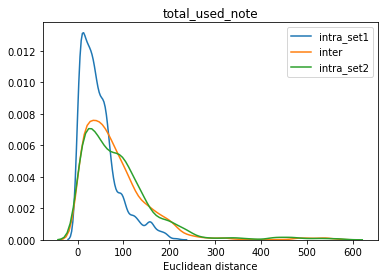

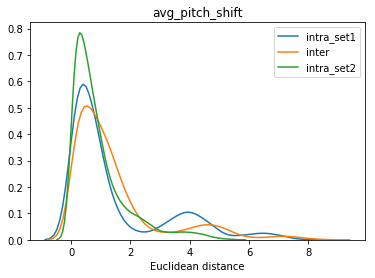

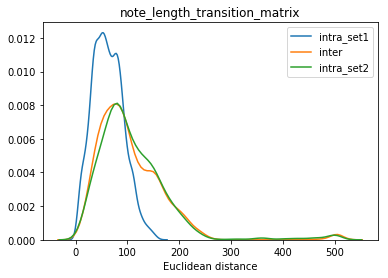

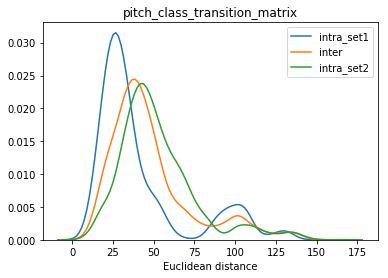

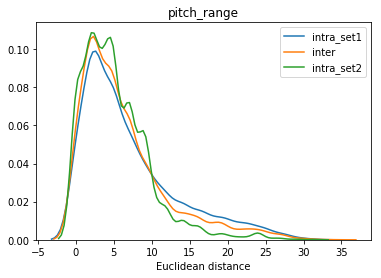

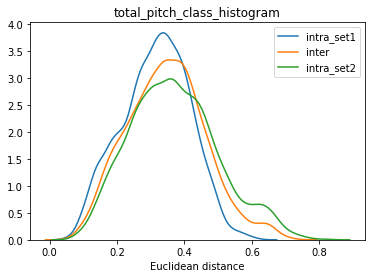

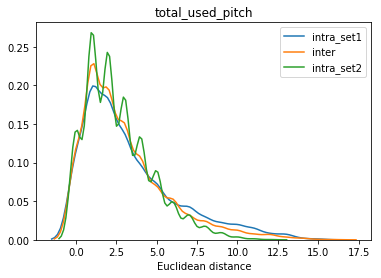

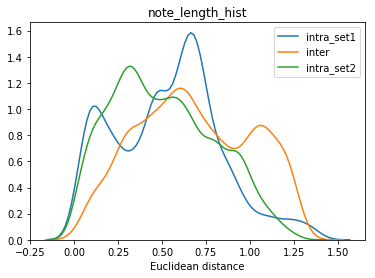

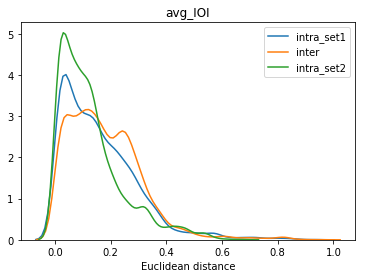

In [13]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [14]:
relative_stats = {}
for i in range(0, len(metrics_list)):
    kl1 = utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i])
    overlap1 = utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i])
    kl2 = utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i])
    overlap2 = utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i])
    metric = metrics_list[i]
    relative_stats[metric] = {
        MODEL_1: {
            'kl_divergence': kl1,
            'overlap_area': overlap1
        },
        MODEL_2: {
            'kl_divergence': kl2,
            'overlap_area': overlap2
        }
    }
    print('------------------------------------------------------------------------------------------------')
    print('Metric: {}'.format(metric))
    print('{} => Kullback–Leibler divergence: {}, Overlap area: {}'.format(MODEL_1, kl1, overlap1))
    print('{} => Kullback–Leibler divergence: {}, Overlap area: {}'.format(MODEL_2, kl2, overlap2))
    print('------------------------------------------------------------------------------------------------\n')

mgeval/utils.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: min(pdf_A(x), pdf_B(x)), np.min((np.min(A), np.min(B))), np.max((np.max(A), np.max(B))))[0]


------------------------------------------------------------------------------------------------
Metric: total_used_note
gpt-4o-mini => Kullback–Leibler divergence: 0.246974142388, Overlap area: 0.702137312371
finetuned => Kullback–Leibler divergence: 0.0228509189814, Overlap area: 0.900014740057
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: avg_pitch_shift
gpt-4o-mini => Kullback–Leibler divergence: 0.0726382304276, Overlap area: 0.758790726279
finetuned => Kullback–Leibler divergence: 0.0403484488521, Overlap area: 0.764570603666
------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------
Metric: note_length_transition_matrix
gpt-4o-mini => Kullback–Leibler divergence: 2.98739474368, Overlap area: